# Kernel Comparisons

Let's take a look at the forms of various kernels.

In [1]:
%matplotlib inline
import sphtests.sph as sph
import sphtests.gadget as gadget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = np.arange(-2, 2, 0.01)
h = 1.

In [3]:
kernels = {
    "GADGET": sph.gadget_kernel,
    "Cubic Spline": sph.cubic_kernel,
    "Quntic Spline": sph.quintic_kernel,
    "Gaussian": sph.gaussian_kernel,
    "Top-Hat": sph.tophat_kernel,
    "Triangle": sph.triangle_kernel
}

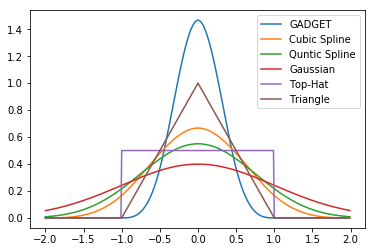

In [4]:
for name, kernel in kernels.items():
    def kernel_at_h(this_r): return kernel(abs(this_r), h)
    kernel_values = list(map(kernel_at_h, r))
    plt.plot(r, kernel_values, label=name)
    
plt.legend()

This isn't really 'fair' as we change $h$. Let's do our smoothed reduction.

In [5]:
positions = abs(np.arange(-50, 50))
eta = 0.84

/Users/josh/Documents/sph1d/sphtests/sph.py:11: RuntimeWarning: divide by zero encountered in true_divide
  factor = r/h
/Users/josh/Documents/sph1d/sphtests/sph.py:13: RuntimeWarning: divide by zero encountered in true_divide
  prefactor = 1.1*4/(3 * h)
/Users/josh/Documents/sph1d/sphtests/sph.py:23: RuntimeWarning: invalid value encountered in multiply
  return prefactor * poly
/Users/josh/Documents/sph1d/sphtests/sph.py:11: RuntimeWarning: invalid value encountered in true_divide
  factor = r/h
/Users/josh/Documents/sph1d/sphtests/sph.py:12: RuntimeWarning: overflow encountered in multiply
  factor2 = factor * factor
/Users/josh/Documents/sph1d/sphtests/sph.py:11: RuntimeWarning: overflow encountered in true_divide
  factor = r/h
/Users/josh/Documents/sph1d/sphtests/sph.py:13: RuntimeWarning: overflow encountered in true_divide
  prefactor = 1.1*4/(3 * h)
/Users/josh/Documents/sph1d/sphtests/sph.py:12: RuntimeWarning: overflow encountered in double_scalars
  factor2 = factor * facto

ZeroDivisionError: float division by zero

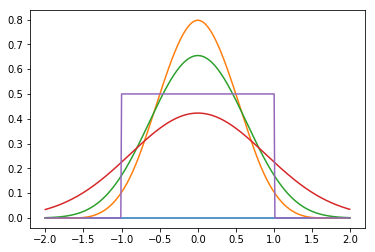

In [6]:
for name, kernel in kernels.items():
    if name == "triangle": continue
    this_h = gadget.h(positions, eta=eta, kernel=kernel)
    def kernel_at_h(this_r): return kernel(abs(this_r), abs(this_h))
    kernel_values = list(map(kernel_at_h, r))
    plt.plot(r, kernel_values, label=f"{name} h = {this_h:{2.3}}")
    
plt.legend()

In [7]:
values_of_h = np.arange(0.01, 2, 0.01)

Text(0.5,0,'h')

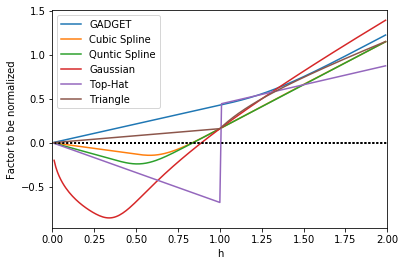

In [8]:
for name, kernel in kernels.items():
    #if name != "GADGET": continue
        
    def density_at_r(h):
        return h - eta / gadget.density(abs(positions), h, kernel=kernel)
    
    density = list(map(density_at_r, values_of_h))
    plt.plot(values_of_h, density, label=f"{name}")
    plt.plot([-10, 10], [0, 0], color='black', ls='dotted')
    
plt.legend()
plt.xlim(0, 2)
plt.ylabel("Factor to be normalized")
plt.xlabel("h")